Ejercicio 2 (50 puntos)

En este ejercicio trabajarás con datos que vienen de un experimento en el que se midió actividad muscular con la técnica de la Electromiografía en el brazo derecho de varios participantes cuando éstos realizaban un movimiento con la mano entre siete posible (Flexionar hacia arriba, Flexionar hacia abajo, Cerrar la mano, Estirar la mano, Abrir la mano, Coger un objeto, No moverse). Al igual que en el ejercicio anterior, los datos se cargan con la función loadtxt de numpyLinks to an external site.. A su vez, la primera columna corresponde a la clase (1, 2, 3, 4, 5, 6, y 7), la segunda columna se ignora, y el resto de las columnas indican las variables que se calcularon de la respuesta muscular. El archivo de datos con el que trabajarás depende de tu matrícula.

1. Determina si es necesario balancear los datos. En caso de que sea afirmativo, en todo este ejercicio tendrás que utilizar alguna estrategia para mitigar el problema de tener una muestra desbalanceada.

In [1]:
import numpy as np
import collections

# Cargar los datos desde el archivo, ignorando la segunda columna
data = np.loadtxt('M_2.txt', delimiter='\t', usecols=[0] + list(range(2, 20)))

# Extraer las etiquetas de clase (primera columna)
labels = data[:, 0]

# Contar la frecuencia de cada clase
class_counts = collections.Counter(labels)

# Mostrar la distribución de las clases
print("Distribución de clases:")
for clase, count in class_counts.items():
    print(f"Clase {int(clase)}: {count} muestras")

# Calcular la proporción de cada clase
total_samples = len(labels)
for clase, count in class_counts.items():
    proportion = count / total_samples * 100
    print(f"Clase {int(clase)}: {proportion:.2f}% del total")


Distribución de clases:
Clase 1: 90 muestras
Clase 2: 90 muestras
Clase 3: 90 muestras
Clase 4: 90 muestras
Clase 5: 90 muestras
Clase 6: 90 muestras
Clase 7: 90 muestras
Clase 1: 14.29% del total
Clase 2: 14.29% del total
Clase 3: 14.29% del total
Clase 4: 14.29% del total
Clase 5: 14.29% del total
Clase 6: 14.29% del total
Clase 7: 14.29% del total


2. Evalúa al menos 8 modelos de clasificación distintos utilizando validación cruzada, y determina cuál de ellos es el más efectivo.

In [3]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Cargar los datos
data = np.loadtxt('M_2.txt', delimiter='\t', usecols=[0] + list(range(2, 20)))
x = data[:, 2:]  # Ignorar la segunda columna
y = data[:, 0]   # Primera columna es la clase

# Definir los modelos
models = {
    'Linear SVM': SVC(kernel='linear'),
    'RBF SVM': SVC(kernel='rbf'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression(),
    'K-Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'MLP': MLPClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
}

# Evaluar los modelos con validación cruzada
kf = StratifiedKFold(n_splits=5, shuffle=True)

for model_name, model in models.items():
    print(f'----- {model_name} -----')

    cv_y_test = []
    cv_y_pred = []

    for train_index, test_index in kf.split(x, y):
        # Fase de entrenamiento
        x_train = x[train_index, :]
        y_train = y[train_index]

        # Entrenar el modelo
        model.fit(x_train, y_train)

        # Fase de prueba
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = model.predict(x_test)

        cv_y_test.append(y_test)
        cv_y_pred.append(y_pred)

    # Imprimir el reporte de clasificación
    print(classification_report(np.concatenate(cv_y_test), np.concatenate(cv_y_pred)))

#------------------------------------------------------------------------------------------------------------------
#   End of file
#------------------------------------------------------------------------------------------------------------------


----- Linear SVM -----
              precision    recall  f1-score   support

         1.0       0.76      0.88      0.81        90
         2.0       0.61      0.70      0.65        90
         3.0       0.91      0.92      0.92        90
         4.0       0.84      0.82      0.83        90
         5.0       0.67      0.58      0.62        90
         6.0       0.79      0.60      0.68        90
         7.0       0.87      0.94      0.90        90

    accuracy                           0.78       630
   macro avg       0.78      0.78      0.77       630
weighted avg       0.78      0.78      0.77       630

----- RBF SVM -----
              precision    recall  f1-score   support

         1.0       0.74      0.82      0.78        90
         2.0       0.58      0.76      0.66        90
         3.0       0.85      0.93      0.89        90
         4.0       0.74      0.76      0.75        90
         5.0       0.58      0.42      0.49        90
         6.0       0.69      0.41  

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

              precision    recall  f1-score   support

         1.0       0.63      0.80      0.71        90
         2.0       0.52      0.62      0.57        90
         3.0       0.87      0.91      0.89        90
         4.0       0.70      0.69      0.70        90
         5.0       0.60      0.30      0.40        90
         6.0       0.60      0.53      0.56        90
         7.0       0.86      0.98      0.92        90

    accuracy                           0.69       630
   macro avg       0.68      0.69      0.68       630
weighted avg       0.68      0.69      0.68       630

----- Naive Bayes -----
              precision    recall  f1-score   support

         1.0       0.58      0.78      0.66        90
         2.0       0.52      0.73      0.61        90
         3.0       0.78      0.91      0.84        90
         4.0       0.77      0.48      0.59        90
         5.0       0.38      0.14      0.21        90
         6.0       0.43      0.40      0.42        90


c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization has

              precision    recall  f1-score   support

         1.0       0.80      0.87      0.83        90
         2.0       0.64      0.70      0.67        90
         3.0       0.87      0.93      0.90        90
         4.0       0.79      0.81      0.80        90
         5.0       0.66      0.48      0.55        90
         6.0       0.69      0.62      0.65        90
         7.0       0.88      0.96      0.91        90

    accuracy                           0.77       630
   macro avg       0.76      0.77      0.76       630
weighted avg       0.76      0.77      0.76       630

----- Linear Discriminant Analysis -----
              precision    recall  f1-score   support

         1.0       0.78      0.84      0.81        90
         2.0       0.61      0.66      0.63        90
         3.0       0.88      0.93      0.90        90
         4.0       0.80      0.73      0.76        90
         5.0       0.63      0.54      0.58        90
         6.0       0.75      0.61    

c:\Users\PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


3. Escoge al menos dos clasificadores que hayas evaluado en el paso anterior e identifica sus hiperparámetros. Lleva a cabo el proceso de validación cruzada anidada para evaluar los dos modelos con la selección óptima de hiperparámetros.

----- KNN classifier - K parameter -----
---- k = 1
ACC: 0.6761904761904762
---- k = 2
ACC: 0.6492063492063492
---- k = 3
ACC: 0.6904761904761905
---- k = 4
ACC: 0.6841269841269841
---- k = 5
ACC: 0.7079365079365079
---- k = 6
ACC: 0.7111111111111111
---- k = 7
ACC: 0.6984126984126984
---- k = 8
ACC: 0.7095238095238096
---- k = 9
ACC: 0.6952380952380952
---- k = 10
ACC: 0.7126984126984126
---- k = 11
ACC: 0.7190476190476192
---- k = 12
ACC: 0.7063492063492063
---- k = 13
ACC: 0.707936507936508
---- k = 14
ACC: 0.7079365079365079
---- k = 15
ACC: 0.7063492063492064
---- k = 16
ACC: 0.692063492063492
---- k = 17
ACC: 0.7015873015873015
---- k = 18
ACC: 0.7015873015873015
---- k = 19
ACC: 0.7063492063492063
---- k = 20
ACC: 0.7095238095238094
---- k = 21
ACC: 0.7095238095238097
---- k = 22
ACC: 0.6968253968253968
---- k = 23
ACC: 0.6952380952380952
---- k = 24
ACC: 0.7031746031746031
---- k = 25
ACC: 0.6904761904761905
---- k = 26
ACC: 0.692063492063492
---- k = 27
ACC: 0.6904761904761905

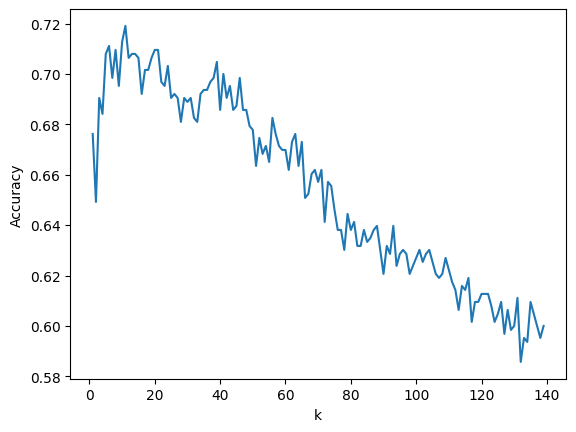

----- SVM classifier - Regularization parameter -----
---- C = 0.001
ACC: 0.6396825396825396
---- C = 0.0010974987654930556
ACC: 0.6412698412698412
---- C = 0.0012045035402587824
ACC: 0.634920634920635
---- C = 0.0013219411484660286
ACC: 0.6476190476190476
---- C = 0.0014508287784959402
ACC: 0.6587301587301587
---- C = 0.0015922827933410922
ACC: 0.6650793650793652
---- C = 0.001747528400007683
ACC: 0.665079365079365
---- C = 0.0019179102616724887
ACC: 0.6619047619047619
---- C = 0.00210490414451202
ACC: 0.6682539682539683
---- C = 0.0023101297000831605
ACC: 0.6714285714285715
---- C = 0.0025353644939701114
ACC: 0.6777777777777778
---- C = 0.0027825594022071257
ACC: 0.6761904761904762
---- C = 0.0030538555088334154
ACC: 0.6746031746031746
---- C = 0.003351602650938841
ACC: 0.6888888888888889
---- C = 0.0036783797718286343
ACC: 0.7015873015873015
---- C = 0.004037017258596553
ACC: 0.6968253968253968
---- C = 0.004430621457583882
ACC: 0.7047619047619047
---- C = 0.004862601580065354
ACC: 

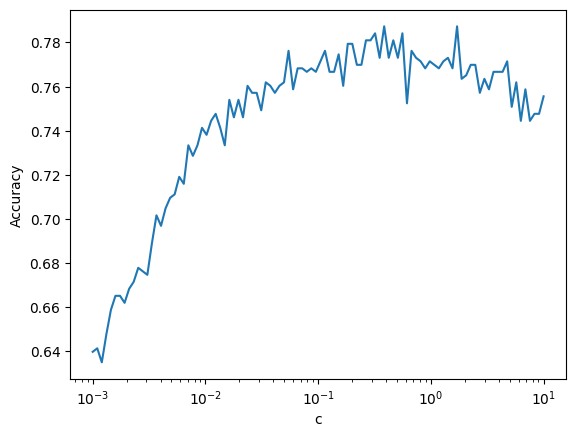

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargar los datos
data = np.loadtxt('M_2.txt', delimiter='\t', usecols=[0] + list(range(2, 20)))
x = data[:, 2:]  # Ignorar la segunda columna
y = data[:, 0]   # Primera columna es la clase

#------------------------------------------------------------------------------------------------------------------
# K parameter of the KNN classifier
#------------------------------------------------------------------------------------------------------------------

print("----- KNN classifier - K parameter -----")

kk = np.arange(1,140)

acc = []

for k in kk:
    print('---- k =', k)
    
    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        clf_cv = KNeighborsClassifier(n_neighbors=k)             

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)    
        
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)    

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)
    
    print('ACC:', acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = kk[opt_index]
print("Optimal k: ", opt_hyperparameter)

plt.plot(kk, acc)
plt.xlabel("k")
plt.ylabel("Accuracy")

plt.show()

#------------------------------------------------------------------------------------------------------------------
# Regularization parameter of the linear SVM classifier
#------------------------------------------------------------------------------------------------------------------

print("----- SVM classifier - Regularization parameter -----")

cc = np.logspace(-3, 1, 100)

acc = []

for c in cc:
    print('---- C =', c)
    
    acc_cv = []

    kf = StratifiedKFold(n_splits=5, shuffle = True)

    for train_index, test_index in kf.split(x, y):
    
        # Training phase
        x_train = x[train_index, :]
        y_train = y[train_index]     

        clf_cv = SVC(C=c, kernel = 'linear')            

        clf_cv.fit(x_train, y_train)

        # Test phase
        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)    
        
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)    

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)
    
    print('ACC:', acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = cc[opt_index]
print("Optimal C: ", opt_hyperparameter)

plt.plot(cc, acc)
plt.xscale('log')
plt.xlabel("c")
plt.ylabel("Accuracy")

plt.show()

4. Prepara tus modelos para producción haciendo lo siguiente:

    A. Opten los hiperparámetros óptimos utilizando todo el conjunto de datos con validación cruzada.
    
    B. Con los hiperparámetros óptimos, ajusta el modelo con todos los datos.

----- KNN classifier - K parameter -----
---- k = 1
ACC: 0.6619047619047619
---- k = 2
ACC: 0.653968253968254
---- k = 3
ACC: 0.6968253968253968
---- k = 4
ACC: 0.6682539682539682
---- k = 5
ACC: 0.7047619047619047
---- k = 6
ACC: 0.7047619047619047
---- k = 7
ACC: 0.6777777777777778
---- k = 8
ACC: 0.7015873015873015
---- k = 9
ACC: 0.7
---- k = 10
ACC: 0.6857142857142857
---- k = 11
ACC: 0.7095238095238094
---- k = 12
ACC: 0.7095238095238094
---- k = 13
ACC: 0.7253968253968254
---- k = 14
ACC: 0.7126984126984127
---- k = 15
ACC: 0.7063492063492065
---- k = 16
ACC: 0.707936507936508
---- k = 17
ACC: 0.7079365079365079
---- k = 18
ACC: 0.7
---- k = 19
ACC: 0.7031746031746031
---- k = 20
ACC: 0.7126984126984127
---- k = 21
ACC: 0.6968253968253968
---- k = 22
ACC: 0.6952380952380952
---- k = 23
ACC: 0.6968253968253968
---- k = 24
ACC: 0.6952380952380952
---- k = 25
ACC: 0.6904761904761905
---- k = 26
ACC: 0.6984126984126984
---- k = 27
ACC: 0.7
---- k = 28
ACC: 0.6936507936507936
---- k 

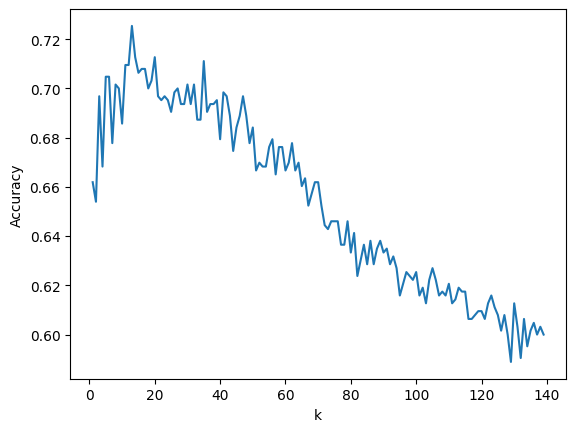

Accuracy with optimal k: 0.746031746031746
----- SVM classifier - Regularization parameter -----
---- C = 0.001
ACC: 0.6317460317460317
---- C = 0.0010974987654930556
ACC: 0.6444444444444445
---- C = 0.0012045035402587824
ACC: 0.6523809523809524
---- C = 0.0013219411484660286
ACC: 0.653968253968254
---- C = 0.0014508287784959402
ACC: 0.6555555555555556
---- C = 0.0015922827933410922
ACC: 0.653968253968254
---- C = 0.001747528400007683
ACC: 0.6571428571428571
---- C = 0.0019179102616724887
ACC: 0.6746031746031746
---- C = 0.00210490414451202
ACC: 0.6714285714285715
---- C = 0.0023101297000831605
ACC: 0.6698412698412698
---- C = 0.0025353644939701114
ACC: 0.6857142857142857
---- C = 0.0027825594022071257
ACC: 0.6904761904761905
---- C = 0.0030538555088334154
ACC: 0.6841269841269841
---- C = 0.003351602650938841
ACC: 0.6904761904761905
---- C = 0.0036783797718286343
ACC: 0.6873015873015873
---- C = 0.004037017258596553
ACC: 0.6968253968253968
---- C = 0.004430621457583882
ACC: 0.707936507

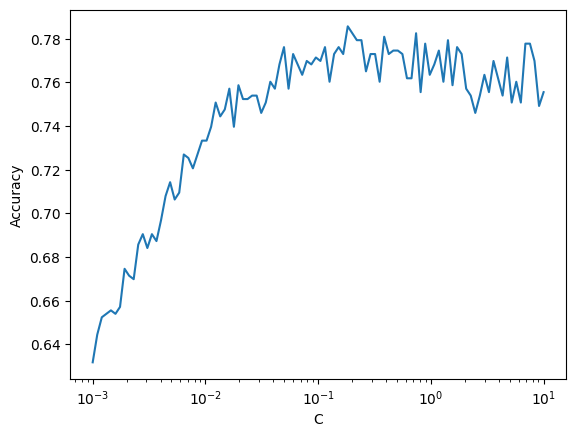

Accuracy with optimal C: 0.8142857142857143


In [6]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo, ignorando la segunda columna
data = np.loadtxt('M_2.txt', delimiter='\t', usecols=[0] + list(range(2, 20)))
x = data[:, 2:]  # Ignorar la segunda columna
y = data[:, 0]   # Primera columna es la clase

print("----- KNN classifier - K parameter -----")

kk = np.arange(1, 140)
acc = []

for k in kk:
    print('---- k =', k)
    
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x, y):
        x_train = x[train_index, :]
        y_train = y[train_index]     

        clf_cv = KNeighborsClassifier(n_neighbors=k)             
        clf_cv.fit(x_train, y_train)

        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)    
        
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)    

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)
    
    print('ACC:', acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = kk[opt_index]
print("Optimal k: ", opt_hyperparameter)

plt.plot(kk, acc)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()

# Ajustar el modelo con los hiperparámetros óptimos
clf_opt = KNeighborsClassifier(n_neighbors=opt_hyperparameter)
clf_opt.fit(x, y)

# Evaluar la precisión del modelo con los hiperparámetros óptimos
y_pred_opt = clf_opt.predict(x)
accuracy_opt = accuracy_score(y, y_pred_opt)

print("Accuracy with optimal k:", accuracy_opt)

print("----- SVM classifier - Regularization parameter -----")

cc = np.logspace(-3, 1, 100)
acc = []

for c in cc:
    print('---- C =', c)
    
    acc_cv = []
    kf = StratifiedKFold(n_splits=5, shuffle=True)

    for train_index, test_index in kf.split(x, y):
        x_train = x[train_index, :]
        y_train = y[train_index]     

        clf_cv = SVC(C=c, kernel='linear')            
        clf_cv.fit(x_train, y_train)

        x_test = x[test_index, :]
        y_test = y[test_index]
        y_pred = clf_cv.predict(x_test)    
        
        acc_i = accuracy_score(y_test, y_pred)
        acc_cv.append(acc_i)    

    acc_hyp = np.average(acc_cv)
    acc.append(acc_hyp)
    
    print('ACC:', acc_hyp)

opt_index = np.argmax(acc)
opt_hyperparameter = cc[opt_index]
print("Optimal C: ", opt_hyperparameter)

plt.plot(cc, acc)
plt.xscale('log')
plt.xlabel("C")
plt.ylabel("Accuracy")
plt.show()

# Ajustar el modelo con los hiperparámetros óptimos
clf_opt = SVC(C=opt_hyperparameter, kernel='linear')
clf_opt.fit(x, y)

# Evaluar la precisión del modelo con los hiperparámetros óptimos
y_pred_opt = clf_opt.predict(x)
accuracy_opt = accuracy_score(y, y_pred_opt)

print("Accuracy with optimal C:", accuracy_opt)


5. Contesta lo siguientes:
    A. ¿Observas un problema en cuanto al balanceo de las clases? ¿Por qué?

    Las clases están balanceadas teniendo 90 muestras cada una, por lo tanto no le veo ningún problema al balanceo de estas.

    Distribución de clases:
    Clase 1: 90 muestras
    Clase 2: 90 muestras
    Clase 3: 90 muestras
    Clase 4: 90 muestras
    Clase 5: 90 muestras
    Clase 6: 90 muestras
    Clase 7: 90 muestras
    Clase 1: 14.29% del total
    Clase 2: 14.29% del total
    Clase 3: 14.29% del total
    Clase 4: 14.29% del total
    Clase 5: 14.29% del total
    Clase 6: 14.29% del total
    Clase 7: 14.29% del total

    B. ¿Qué modelo o modelos fueron efectivos para clasificar tus datos? ¿Observas algo especial sobre los modelos? Argumenta tu respuesta.

    Mi modelo más efectivo fue el linear ya que es el que más precisión general me ofrece con un 78%, los demás modelos no se quedaron muy atrás en porcentajes de precisión. 

    La única observación que pude hacer fue acerca de mi modelo KNN, una peculiaridad que noté es que este modelo normalmente alcanza el valor pico muy rápido con valores de k bajos y desde ese punto mientras k valores se van probando más va reduciendo la efectividad del modelo.

    C. ¿Observas alguna mejora importante al optimizar hiperparámetros? ¿Es el resultado que esperabas? Argumenta tu respuesta.

    Se puede observar una diferencia significativa sobretodo en el modelo KNN que ya con los k óptimos subió hasta una precisión de 74% a comparación del 69% que mostrababa al inicio. La verdad al inicio esperaba un aumento más significativo pero creo que me hubiera ayudado el probar con más modelos para ver si las diferencias erán más significativas en estos otros con los hiperparámetros óptimos.

    D. ¿Qué inconvenientes hay al encontrar hiperparámetros? ¿Por qué?
    
    Algunos de los inconvenientes pueden ser que la búsqueda de hiperparámetros sobretodo en rangos grandes puede ser muy costosa computacionalmente ya que cada combinación de hiperparámetros requiere su propio entrenamiento y evaluación del modelo, lo cuál puede ser intensivo en recursos y tiempo.

    Otro inconveniente puede ser el overfitting en el conjunto de validación ya que ajustar los hiperparámetros maximizando la precisión en el conjunto de validación puede llevarnos a un sobreajuste en ese conjunto.
    